### This notebook presents initial exploration (mainly descriptive analytics) on the Blue Bikes trip data from January 2019 to June 2019.
### There are about 774K observations with variables such as Trip Duration, Start Time, Stop Time, Start Station ID/Name/Lat/Long, End Station ID/Name/Lat/Long, Bike ID, User Type, Birth Year and Gender

In [11]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
plt.rc('figure', figsize=(10,6))
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1,
        color_codes=True, rc={'figure.figsize':(10,6)})

In [2]:
path = os.getcwd() + '/'
path

'/Users/macbook/Documents/Academic/Courses/Summer 19/CS602 Python/Homework assignment/HW5/'

In [3]:
# Read each month of data
bluebikes_201901 = pd.read_csv(path + 'bluebikes_201901.csv', sep=',', engine='python')
bluebikes_201902 = pd.read_csv(path + 'bluebikes_201902.csv', sep=',', engine='python')
bluebikes_201903 = pd.read_csv(path + 'bluebikes_201903.csv', sep=',', engine='python')
bluebikes_201904 = pd.read_csv(path + 'bluebikes_201904.csv', sep=',', engine='python')
bluebikes_201905 = pd.read_csv(path + 'bluebikes_201902.csv', sep=',', engine='python')
bluebikes_201906 = pd.read_csv(path + 'bluebikes_201906.csv', sep=',', engine='python')

In [4]:
# Concatenate all months of data
bluebikes_all_months = pd.concat([bluebikes_201901,bluebikes_201902,bluebikes_201903,
           bluebikes_201904,bluebikes_201905,bluebikes_201906])
bluebikes_all_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 773889 entries, 0 to 274021
Data columns (total 15 columns):
tripduration               773889 non-null int64
starttime                  773889 non-null object
stoptime                   773889 non-null object
start station id           773889 non-null int64
start station name         773889 non-null object
start station latitude     773889 non-null float64
start station longitude    773889 non-null float64
end station id             773889 non-null int64
end station name           773889 non-null object
end station latitude       773889 non-null float64
end station longitude      773889 non-null float64
bikeid                     773889 non-null int64
usertype                   773889 non-null object
birth year                 773889 non-null int64
gender                     773889 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 94.5+ MB


#### We also need to merge the above data with the data set that has info about each station in order to get the number of dock and municipality of each bike station

In [5]:
stations = pd.read_csv(path + 'Hubway_Stations_as_of_July_2017.csv', sep=',', engine='python')
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 7 columns):
Station ID         281 non-null object
Station            281 non-null object
Latitude           281 non-null float64
Longitude          281 non-null float64
Municipality       281 non-null object
publiclyExposed    281 non-null int64
# of Docks         281 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 15.4+ KB


In [33]:
data = pd.merge(bluebikes_all_months, stations, how='inner', left_on='start station name', right_on='Station')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756042 entries, 0 to 756041
Data columns (total 22 columns):
tripduration               756042 non-null int64
starttime                  756042 non-null object
stoptime                   756042 non-null object
start station id           756042 non-null int64
start station name         756042 non-null object
start station latitude     756042 non-null float64
start station longitude    756042 non-null float64
end station id             756042 non-null int64
end station name           756042 non-null object
end station latitude       756042 non-null float64
end station longitude      756042 non-null float64
bikeid                     756042 non-null int64
usertype                   756042 non-null object
birth year                 756042 non-null int64
gender                     756042 non-null int64
Station ID                 756042 non-null object
Station                    756042 non-null object
Latitude                   756042 non-nul

In [7]:
# As there are repeated columns, we're going to delete these
dropped_columns = ['Station ID', 'Latitude', 'Longitude']
data = data.drop(dropped_columns, axis=1)

In [8]:
# Rename each column for naming consistency
data.rename(columns={'tripduration':'trip_duration', 'starttime':'start_time','stoptime':'stop_time',
                               'start station id':'start_station_id','start station name':'start_station_name',
                               'start station latitude':'start_station_lat','start station longitude':'start_station_lon',
                              'end station id':'end_station_id','end station name':'end_station_name',
                              'end station latitude':'end_station_lat','end station longitude':'end_station_lon',
                              'bikeid':'bike_id','usertype':'user_type','birth year':'birth_year',
                     'Station':'station', '# of Docks':'number_of_docks','Municipality':'municipality',
                    'publiclyExposed': 'publicly_exposed'},
           inplace=True)

### Number of stations

In [9]:
len(data.station.unique())

265

### Number of rides made by each type of riders: Customer vs Subscriber

Subscriber    619176
Customer      136866
Name: user_type, dtype: int64

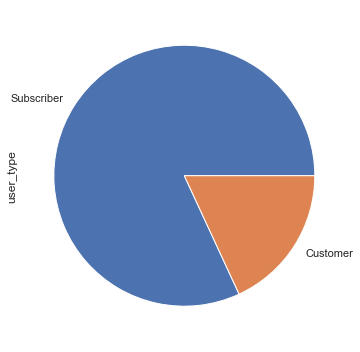

In [12]:
data['user_type'].value_counts().plot.pie()
data['user_type'].value_counts()

### Let's explore the duration of a trip

#### As the trip duration is currently in seconds, we'd better convert it to minutes

In [13]:
data['trip_duration_min'] = (data['trip_duration'] / 60).astype(int)

#### Descriptive stats on trip duration

count    756042.000000
mean         24.479250
std         359.787896
min           1.000000
25%           6.000000
50%          11.000000
75%          19.000000
max       47212.000000
Name: trip_duration_min, dtype: float64

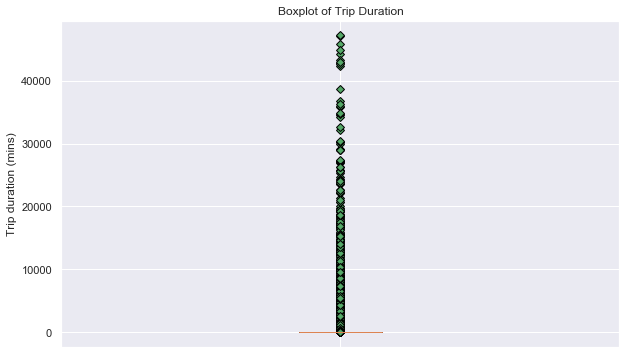

In [14]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig,ax = plt.subplots()
ax.boxplot(data['trip_duration_min'], flierprops=green_diamond)
ax.set(title='Boxplot of Trip Duration', xticklabels='', ylabel='Trip duration (mins)')
data.trip_duration_min.describe()

#### We can see that there are many outliers in the dataset, making it difficult to see the distribution. Let's find out which group of riders has these outliers

### Trip duration with regards to User type

[Text(0, 0.5, 'Trip duration (mins)'),
 Text(0.5, 0, 'User type'),
 Text(0.5, 1.0, 'Boxplot of Trip Duration with regards to Customer/Subscriber')]

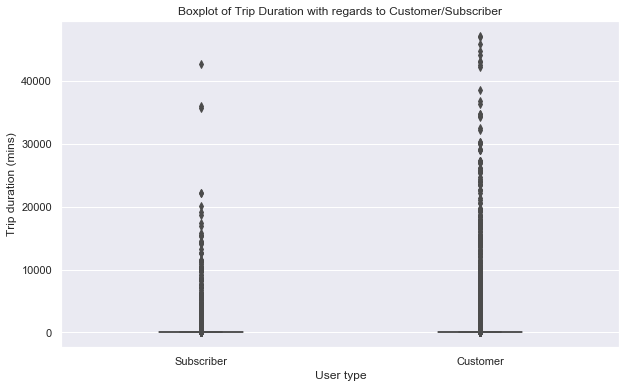

In [15]:
sns.boxplot(data=data, x='user_type', y='trip_duration_min', width=0.3, color='g').set(
title='Boxplot of Trip Duration with regards to Customer/Subscriber',
xlabel='User type', ylabel='Trip duration (mins)')

#### There are actually outliers in both group of riders, so we may want to filter out outliers with regards to each type of rider. To filter those outliers, however, we need to choose a threshold. From the info on Blue Bikes's website, a trip for Customers can be either Single Ride (30mins) or Adventure Pass (120 mins), whereas for Annual/Monthly Subscribers it is 45 mins. So we can pick 120 mins as the threshold for Customers, and 45 mins for Subscribers
##### Blue Bikes website: https://www.bluebikes.com/pricing

In [16]:
# Filter outliers with regards to each type of riders
data_customer = data[
    (data['user_type'] == 'Customer') &
    (data['trip_duration_min'] <= 120)
]
data_subscriber = data[
    (data['user_type'] == 'Subscriber') &
    (data['trip_duration_min'] <= 45)
]
data_no_outliers = pd.concat([data_customer,data_subscriber])

#### Let's see the boxplot distribution for Trip duration again

[Text(0, 0.5, 'Trip duration (mins)'),
 Text(0.5, 0, 'User type'),
 Text(0.5, 1.0, 'Boxplot of Trip Duration with regards to Customer/Subscriber (Outliers filtered out)')]

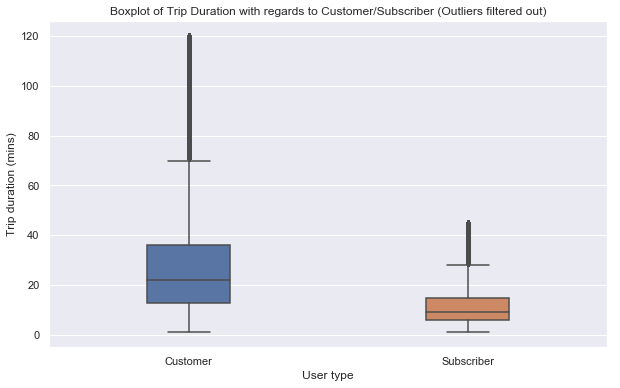

In [17]:
sns.boxplot(data=data_no_outliers, x='user_type', y='trip_duration_min',
           width=0.3, fliersize=4).set(
title='Boxplot of Trip Duration with regards to Customer/Subscriber (Outliers filtered out)',
xlabel='User type', ylabel='Trip duration (mins)')

#### Now it's easier to see that the trip duration is different for each group of riders. The median tells us that the duration for Customer riders are about 20 mins whereas it's 10 mins for Subscriber riders. Also, looking at the length of the box, we can see that for Customer riders, the length of a trip is much more varied than that for Subscriber

#### How about the age of a rider? Is trip duration also different with regards to this variable? 

### Trip duration with regards to the Age of riders

#### Let's first see the descriptive stats on the variable Age 

In [18]:
# As we don't have the varible Age yet, we need to calculate that
data_no_outliers['age'] = 2019 - data_no_outliers['birth_year'].astype(int)
data_no_outliers.age.describe()

count    745862.000000
mean         35.083149
std          11.538941
min          16.000000
25%          26.000000
50%          31.000000
75%          43.000000
max         133.000000
Name: age, dtype: float64

#### It looks so absurd that some riders are still able to ride a bike even though they're around 100 years old! (max=133) The reason could be that this field is self-reported by the rider so it will not make much sense to do detailed analysis on this variable

### We can probably look at Trip duration with regards to Weekday

#### There's no weekday variable in the data set so we need to figure out how to get this variable

In [19]:
data_no_outliers['start_date'] = pd.to_datetime(data_no_outliers['start_time'].apply(lambda x : x[:10]))
data_no_outliers['weekday'] = data_no_outliers['start_date'].dt.day_name()
data_no_outliers.head()

trip_duration                start_time                 stop_time  \
19             846  2019-01-01 13:51:42.6750  2019-01-01 14:05:49.1350   
20             729  2019-01-01 13:53:28.5330  2019-01-01 14:05:38.2480   
54             870  2019-01-02 15:24:26.6100  2019-01-02 15:38:56.8610   
186            374  2019-01-03 21:41:36.2490  2019-01-03 21:47:50.8370   
240            749  2019-01-04 17:22:55.2710  2019-01-04 17:35:24.6660   

     start_station_id                       start_station_name  \
19                 80  MIT Stata Center at Vassar St / Main St   
20                 80  MIT Stata Center at Vassar St / Main St   
54                 80  MIT Stata Center at Vassar St / Main St   
186                80  MIT Stata Center at Vassar St / Main St   
240                80  MIT Stata Center at Vassar St / Main St   

     start_station_lat  start_station_lon  end_station_id  \
19           42.362131         -71.091156             361   
20           42.362131         -71.091156             361   
54           42.362131         -71.091156             190   
186          42.362131         -71.091156             179   
240          42.362131         -71.091156              74   

                        end_station_name  end_station_lat  ...  birth_year  \
19      Deerfield St at Commonwealth Ave        42.349244  ...        1969   
20      Deerfield St at Commonwealth Ave        42.349244  ...        1969   
54     Nashua Street at Red Auerbach Way        42.365673  ...        1969   
186                        MIT Vassar St        42.355601  ...        1969   
240  Harvard Square at Mass Ave/ Dunster        42.373268  ...        1984   

     gender                                  station  municipality  \
19        0  MIT Stata Center at Vassar St / Main St     Cambridge   
20        0  MIT Stata Center at Vassar St / Main St     Cambridge   
54        0  MIT Stata Center at Vassar St / Main St     Cambridge   
186       0  MIT Stata Center at Vassar St / Main St     Cambridge   
240       1  MIT Stata Center at Vassar St / Main St     Cambridge   

     publicly_exposed number_of_docks trip_duration_min  age  start_date  \
19                  1              27                14   50  2019-01-01   
20                  1              27                12   50  2019-01-01   
54                  1              27                14   50  2019-01-02   
186                 1              27                 6   50  2019-01-03   
240                 1              27                12   35  2019-01-04   

       weekday  
19     Tuesday  
20     Tuesday  
54   Wednesday  
186   Thursday  
240     Friday  

[5 rows x 23 columns]

#### Now we can see how Trip duration is different with regards to Weekday

In [20]:
sns.boxplot(data=data_no_outliers, x='weekday', y='trip_duration_min', saturation=0.7, fliersize=3,
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).set(
           title='Boxplot of Trip duration with regards to Weekday',
           ylabel='Trip duration (mins)', xlabel='Weekday')

[Text(0, 0.5, 'Trip duration (mins)'),
 Text(0.5, 0, 'Weekday'),
 Text(0.5, 1.0, 'Boxplot of Trip duration with regards to Weekday')]

#### The distribution is pretty as much as we expect, with riders taking a little longer trip during weekends. However, is this pattern similar for each group of riders? 

In [21]:
sns.boxplot(data=data_no_outliers, x='weekday', y='trip_duration_min', hue='user_type',
            saturation=0.7, fliersize=3,
           order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).set(
           title='Boxplot of Trip duration with regards to Weekday',
           ylabel='Trip duration (mins)', xlabel='Weekday')

[Text(0, 0.5, 'Trip duration (mins)'),
 Text(0.5, 0, 'Weekday'),
 Text(0.5, 1.0, 'Boxplot of Trip duration with regards to Weekday')]

#### There's definitely a little difference in the behaviors between Customers and Subscribers. Trip duration for Subscribers actually seem to stay the same throughout the week, whereas for Customers, trip duration tends to be longer during weekends 

### Station Popularity

#### Let's see which stations are most popular as a start station (i.e. stations where most riders unlock a bike)

##### (Note: As this part of analysis is independent of the Trip duration variable, we're going to use the original dataset instead of the filtered one)

In [22]:
data.groupby(by='start_station_name').size().sort_values(ascending=False).head(10)

start_station_name
MIT at Mass Ave / Amherst St                        21181
MIT Stata Center at Vassar St / Main St             18371
Central Square at Mass Ave / Essex St               16908
South Station - 700 Atlantic Ave                    15013
Kendall T                                           13466
MIT Pacific St at Purrington St                     12868
Nashua Street at Red Auerbach Way                   11177
Harvard Square at Mass Ave/ Dunster                 11052
One Kendall Square at Hampshire St / Portland St    10544
MIT Vassar St                                        9972
dtype: int64

#### Looks like the stations where most people depart are in the area of Cambridge. How about the stations which are the most frequented as an end station?

In [23]:
data.groupby(by='end_station_name').size().sort_values(ascending=False).head(10)

end_station_name
MIT Stata Center at Vassar St / Main St                        19932
MIT at Mass Ave / Amherst St                                   18849
Central Square at Mass Ave / Essex St                          16858
Nashua Street at Red Auerbach Way                              16561
South Station - 700 Atlantic Ave                               14990
MIT Pacific St at Purrington St                                11454
Kendall T                                                      11328
Harvard Square at Mass Ave/ Dunster                            11055
MIT Vassar St                                                   9373
Christian Science Plaza - Massachusetts Ave at Westland Ave     9260
dtype: int64

#### Cambridge is at the top again, with many stations frequented by riders as end point

#### Let's have a look at the number of docks at all stations

[Text(0.5, 0, 'Number of docks'),
 Text(0.5, 1.0, 'Boxplot: Number of docks at stations')]

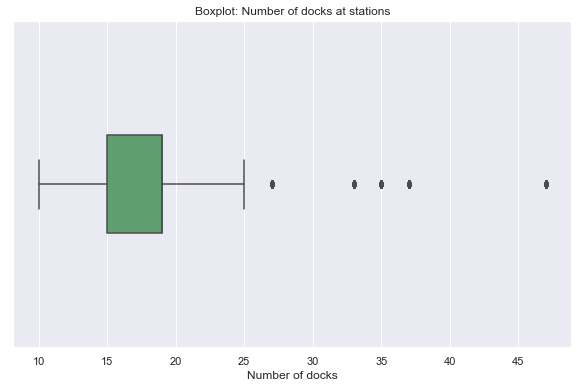

In [24]:
sns.boxplot(data['number_of_docks'], color='g', width=0.3).set(
    title='Boxplot: Number of docks at stations',
xlabel='Number of docks')

#### In general, there are 10 to 25 docks at each station, however, there are stations with significantly more docks. Let's see if these stations are in Cambridge (or unexpectly any other areas)

In [25]:
groupby_stations = data.groupby('station').mean()
above_25_docks_stations = groupby_stations[groupby_stations['number_of_docks'] > 25]
above_25_docks_stations['number_of_docks'].sort_values(ascending=False).head(10)

station
South Station - 700 Atlantic Ave                       47.0
Nashua Street at Red Auerbach Way                      37.0
TD Garden - West End Park                              35.0
Maverick Square - Lewis Mall                           33.0
Copley Square - Dartmouth St at Boylston St            33.0
Packard's Corner - Commonwealth Ave at Brighton Ave    27.0
Newbury St at Hereford St                              27.0
MIT at Mass Ave / Amherst St                           27.0
MIT Stata Center at Vassar St / Main St                27.0
Name: number_of_docks, dtype: float64

#### Interestingly, even though Cambridge is the most popular area where people start and end their rides, the stations with the most number of docks are NOT in this area. However, it completely makes sense for South Station and TD Garden to have the most number of docks

#### Let's see how many docks there are in general at the bike stations in the Cambridge area

[Text(0, 0.5, 'Proportion of stations'),
 Text(0.5, 0, 'Number of docks at a station'),
 Text(0.5, 1.0, 'Stations in Cambridge & their number of docks')]

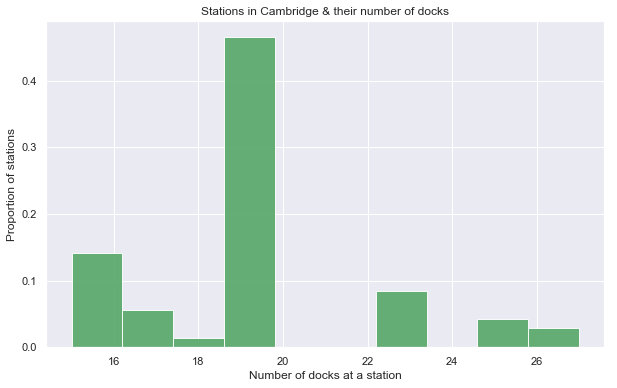

In [26]:
stations_in_Cambridge = data[data['municipality'] == 'Cambridge'].groupby('station').mean()
stations_in_Cambridge['number_of_docks'].plot.hist(density=True, grid=True, color='g', alpha=0.9).set(
    title = 'Stations in Cambridge & their number of docks',
    xlabel='Number of docks at a station', ylabel='Proportion of stations')

#### It seems that about half of stations in the Cambridge area each have 18-19 docks, and just a very small proportion of them have more than 25 docks

### Distance traveled

#### Note: We're going to calculate the distance traveled by riders using two coordinate points in the data (i.e. start station lat/long, end station lat/long). However, as in many cases, riders unlock and return a bike at a same station, so the results may contain many 0

In [27]:
import math
def distance(lat1, lon1, lat2, lon2):
    radius = 7917.5 # mile
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
* math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

data['distance'] = data.apply(lambda row: round(distance(
    row['start_station_lat'], row['start_station_lon'], row['end_station_lat'], row['end_station_lon']), 1),
                             axis=1)

data.tail()


trip_duration                start_time                 stop_time  \
756037            814  2019-06-30 18:31:02.9280  2019-06-30 18:44:36.9610   
756038           1170  2019-06-30 18:48:18.7960  2019-06-30 19:07:49.6130   
756039            330  2019-06-30 19:01:52.3980  2019-06-30 19:07:22.5380   
756040            350  2019-06-30 19:02:07.2500  2019-06-30 19:07:57.5750   
756041           2020  2019-06-30 22:15:28.4970  2019-06-30 22:49:08.6430   

        start_station_id          start_station_name  start_station_lat  \
756037                50  Boylston St at Berkeley St          42.351142   
756038                50  Boylston St at Berkeley St          42.351142   
756039                50  Boylston St at Berkeley St          42.351142   
756040                50  Boylston St at Berkeley St          42.351142   
756041                50  Boylston St at Berkeley St          42.351142   

        start_station_lon  end_station_id  \
756037         -71.073292              26   
756038         -71.073292             178   
756039         -71.073292              54   
756040         -71.073292              54   
756041         -71.073292              90   

                                   end_station_name  end_station_lat  ...  \
756037                  Washington St at Waltham St        42.341522  ...   
756038              MIT Pacific St at Purrington St        42.359573  ...   
756039                        Tremont St at West St        42.354979  ...   
756040                        Tremont St at West St        42.354979  ...   
756041  Lechmere Station at Cambridge St / First St        42.370677  ...   

        bike_id   user_type birth_year  gender                     station  \
756037     4473  Subscriber       1961       1  Boylston St at Berkeley St   
756038     3728  Subscriber       1986       1  Boylston St at Berkeley St   
756039     1308  Subscriber       1987       1  Boylston St at Berkeley St   
756040     2335  Subscriber       1985       2  Boylston St at Berkeley St   
756041     3990  Subscriber       1999       1  Boylston St at Berkeley St   

       municipality publicly_exposed  number_of_docks  trip_duration_min  \
756037       Boston                1               15                 13   
756038       Boston                1               15                 19   
756039       Boston                1               15                  5   
756040       Boston                1               15                  5   
756041       Boston                1               15                 33   

        distance  
756037       1.4  
756038       3.1  
756039       1.1  
756040       1.1  
756041       2.7  

[5 rows x 21 columns]

#### Let's see how many rides in which a person unlocks and returns a bike at a same station

In [28]:
data.distance[data['distance'] == 0].count()

26797

#### And where are these trips with 0 distance?

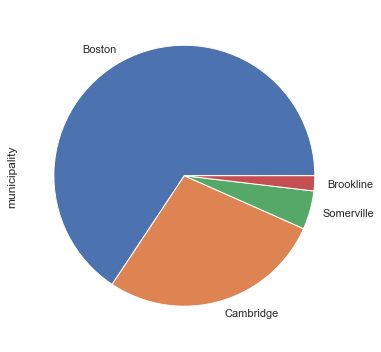

In [29]:
data.municipality[data['distance'] == 0].value_counts().plot.pie()

#### So Boston and Cambridge are where people tend to do a round trip

#### Let's see the distribution of the distance variable

count    756042.000000
mean          2.399981
std           1.678836
min           0.000000
25%           1.200000
50%           2.000000
75%           3.200000
max          15.700000
Name: distance, dtype: float64

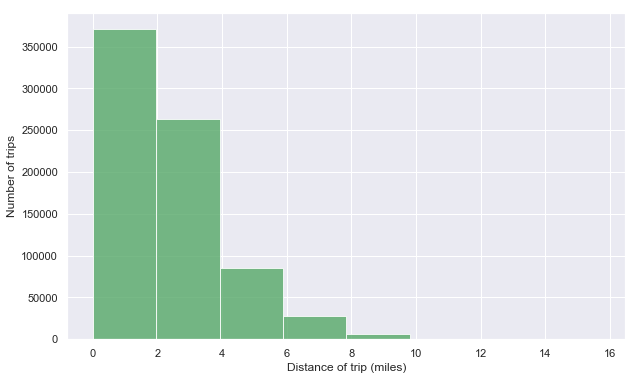

In [30]:
data.distance.plot.hist(bins=8,density=False, color='g', alpha=0.8).set(
    xlabel='Distance of trip (miles)', ylabel='Number of trips')
data.distance.describe()

#### So most of the trips are under 3.2 miles

#### Let's see if the trip distance is different for Customer riders vs Subscriber riders

In [31]:
data['distance_bins'] = pd.cut(data.distance, bins=[0.5,2,3.5,5,15.7],
       labels=(['0.5m - 2m','2m - 3.5m','3.5m - 5m','More than 5m']), right=True)
data.distance_bins.head()

0    0.5m - 2m
1    0.5m - 2m
2    0.5m - 2m
3    0.5m - 2m
4    0.5m - 2m
Name: distance_bins, dtype: category
Categories (4, object): [0.5m - 2m < 2m - 3.5m < 3.5m - 5m < More than 5m]

[Text(0, 0.5, 'Distance'),
 Text(0.5, 0, 'Percentage'),
 Text(0.5, 1.0, 'Difference in trip distance between Customer and Subscriber')]

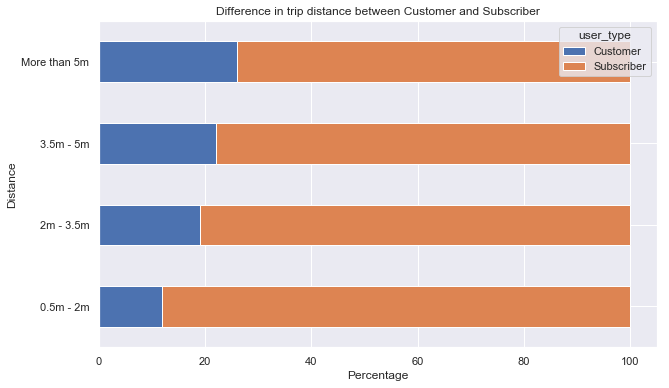

In [32]:
pd.crosstab(index=data.distance_bins, columns=data.user_type).apply(
    lambda x: round((x/x.sum()),2) * 100, axis=1).plot(kind='barh', stacked=True, width=0.5).set(
    title='Difference in trip distance between Customer and Subscriber', ylabel='Distance', xlabel='Percentage')

#### It is pretty clear that as the distance increases, there's an increase in the number of rides made by Customer riders

### In conclusion, about 75% of rides from January 2019 to June 2019 are made by subscriber riders. However, subscribers’ trips tend to be shorter than that of customers (10 minutes vs 20 minutes). Moreover, trip duration for subscribers actually seem to be similar throughout the week, whereas for customers, it tends to be longer during weekends.


### In terms of bike stations, we’ve seen that the most popular stations are not necessarily the ones with the most number of docks.


### Lastly, regarding distance traveled, about 3.6% of all the trips (27000 out of 756000) are round trips (i.e. trips in which riders unlock and return a bike at a same station). And again, we see another difference in distance between the two categories of riders. Particularly, as the distance increases, there's also an increase in the number of rides made by customers.
